# Limpieza de datos

In [2]:
#Librerías necesarias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


Obtenemos los datos por departamento

In [3]:
#Crea un archivo de texto con los nombres de los archivos en tu carpeta Data
!ls Datos > names.txt

In [4]:
#Carga los nombres en un numpy array 
archivos = np.loadtxt('names.txt', dtype='str')

In [5]:
#Crea cada variable con el dataframe del archivo
#Cada variable se llama dept seguido de un número de 0 a 31
for i in range(len(archivos)):
        globals()['dept{}'.format(i)] = pd.read_csv('Datos/{}'.format(archivos[i]), sep='\s+')
        
print("hay", len(archivos), "archivos") 

hay 35 archivos


Creamos departamento 35 que será Antioquia con todos sus datos 

In [6]:
#Para antioquia a mano:
dept35 = pd.DataFrame
dept35 = pd.concat([dept1,dept2], ignore_index=True)

#Lista de todos los departamentos para hacer ciclos sobre ellos:
departamentos = [dept0,dept1,dept2,dept3,dept4,dept5,dept6,dept7,dept8,dept9,dept10,
                 dept11,dept12,dept13,dept14,dept15,dept16,dept17,dept18,dept19,dept20,
                 dept21,dept22,dept23,dept24,dept25,dept26,dept27,dept28,dept29,dept30,
                 dept31,dept32,dept33,dept34, dept35]

### Limpiamos la base de datos para poder manejarla

1. Definimos función para limpiar los DataFrames importados

In [7]:
def Modify(df):
    
    Nvi = []
    df.columns = ['Fecha', 'Ubicacion', 'Victimas', 'Responsables', 'Tipificacion']   
    for i in range(0, len(df['Victimas'])):
        a = int(df['Victimas'][i].replace(',', "").split(":")[-1])
        df['Ubicacion'][i] = df['Ubicacion'][i].replace(',', "")
        df['Victimas'][i] = df['Victimas'][i].replace(',', "")
        df['Responsables'][i] = df['Responsables'][i].replace(',', "")
        Nvi.append(a)
     
    df['NumVictimas'] = Nvi #Crea la columna número de victimas
    df['Fecha'] = df['Fecha'].map(lambda x: x.replace(',', "")).astype("datetime64")
    
    return True

2. Modificamos todos los DataFrames de acuerdo a la función realizada

In [8]:
for i in range(0,len(departamentos)):
    Modify(departamentos[i])

In [9]:
#Visualizando datos importados en Antioquia 
dept35.tail()

,Fecha,Ubicacion,Victimas,Responsables,Tipificacion,NumVictimas
4483,2019-06-24,ANTIOQUIA / REMEDIOS,VALENTINA PINEDA B50; LEALDO ANTONIO SALAS B50...,GRUPOS DE INTOLERANCIA,B:2:50 INTOLERANCIA SOCIAL:ASESINATO; B:2:53 ...,3
4484,2019-06-29,ANTIOQUIA / APARTADÓ / SAN JOSÉ DE APARTADÓ,COMUNIDAD CAMPESINA DE APARTADO (); FAMILIA CA...,PARAMILITARES. EJERCITO. POLICÍA,A:1:18 PERSECUCIÓN POLÍTICA:COLECTIVO AMENAZAD...,0
4485,2019-06-29,ANTIOQUIA / PUERTO BERRÍO,ARCHIBALDO MOSQUERA (1981) B40; N N (1991) B43...,SIN INFORMACIÓN,B:1:40 PERSECUCIÓN POLÍTICA:ASESINATO; B:1:43...,2
4486,2019-06-30,ANTIOQUIA / PUERTO BERRÍO,MIGUEL ANGEL BLANCO (2001) B50 Víctimas:1,GRUPOS DE INTOLERANCIA,B:2:50 INTOLERANCIA SOCIAL:ASESINATO,1
4487,2019-06-30,ANTIOQUIA / PUERTO BERRÍO,N N B40 Víctimas:1,SIN INFORMACIÓN,B:1:40 PERSECUCIÓN POLÍTICA:ASESINATO,1


__DataFrame con las datos de todos los departamentos__

In [10]:
All_depts = pd.concat([dept0,dept35,dept3,dept4,dept5,dept6,dept7,dept8,dept9,dept10,dept11,dept12,dept13,dept14,dept15,dept16,dept17,dept18,dept19,dept20,dept21,dept22,dept23,dept24,dept25,dept26,dept27,dept28,dept29,dept30,dept31,dept32,dept33,dept34], ignore_index=True)

### Limpiamos DataFrame general 

De acuerdo a lo encontrado en la base de datos, reorganizaremos la información para que sea más concreta en cuanto a nuestros intereses de investigación.

- Cambiaremos la ubicación unicamente dependiente del departamento
- Pondremos unicamente un responsable por fila
- Tomaremos unicamente la tipificacion más especifica 

In [11]:
nwdf = []

for i in range(len(All_depts['Responsables'])):
    col = All_depts['Responsables'][i].split(". ")  
    ub = All_depts['Ubicacion'][i].split("/")[0].replace(" ","")
    for rna in col:
        a = [All_depts['Fecha'][i], ub, rna, All_depts['NumVictimas'][i], All_depts['Tipificacion'][i]]
        nwdf.append(a)
        
nw_alldept = pd.DataFrame(nwdf, columns=['Fecha', 'Dept','Resp', 'Nvi', 'Tipo'])

In [12]:
nwdf = []

for i in range(len(nw_alldept['Tipo'])):
    col = nw_alldept['Tipo'][i].replace(';',':').split(':')
    
    if len(col) <=4:
        nwcol = [col[3]]
    if len(col) > 4 and len(col) <= 8:
        nwcol = [col[3], col[7]]
    if len(col) > 8 and len(col) <= 12:
        nwcol = [col[3], col[7], col[11]]
    if len(col) > 12 and len(col) <= 16:
        nwcol = [col[3], col[7], col[11], col[15]]
        
    for tname in nwcol:
        a = [nw_alldept['Fecha'][i], nw_alldept['Dept'][i], nw_alldept['Resp'][i], nw_alldept['Nvi'][i], tname]
        nwdf.append(a)
        
nw_alldept = pd.DataFrame(nwdf, columns=['Fecha', 'Dept','Resp', 'Nvi', 'Tipo'])

In [13]:
##======= Visualizando DataFrame de todos con especificaciones ============

nw_alldept.head()

,Fecha,Dept,Resp,Nvi,Tipo
0,2003-10-09,AMAZONAS,FARC-EP,1,SECUESTRO
1,2003-10-09,AMAZONAS,FARC-EP,1,CATEGORIA INEXISTENTE 95
2,2007-02-22,AMAZONAS,COMBATIENTES,1,LESIÓN A CIVILES EN ACCIÓN BÉLICA
3,2015-04-14,AMAZONAS,POLICÍA,1,LESIÓN FÍSICA
4,2015-04-14,AMAZONAS,POLICÍA,1,COLECTIVO AMENAZADO


### Generamos nuevo Data Frame con clasificaciones nuestras 

De acuerdo a los datos encontrados, decidimos generalizar la clasificación de acuerdo a las siguientes categorías para Responsable ('Resp') y Tipificacion ('Tipo')

1) Tomaremos todos los responsables y los clasificaremos en una de 4 categorias. 
        
__Estado__

'POLICÍA','EJERCITO','CTI','ESTADO COLOMBIANO','AUTORIDAD NACIONAL DE LICENCIAS AMBIENTALES-ANLA','SIJIN', 'FISCALIA','GAULA','DIJIN','INPEC','FUERZA AEREA','FUERZA PUBLICA','ARMADA','DAS','FUERZAS MILITARES'

__Guerrilla__

'FARC-EP','ERG','ERP','EPL','ELN','MOVIMIENTO JAIME BATEMAN CAYON','GUERRILLA'

__Paramilitares__

'ACCU','AUTODEFENSAS CAMPESINAS DEL MAGDALENA MEDIO ACMM','PARAMILITARES','AUC','AUTODEFENSAS DE CASANARE','AUTODEFENSAS DE SANTANDER Y SUR DEL CESAR'

__Empresas__ (Empresas y fundaciones nacionales e internacionales)

'EMPRESAS','ECOPETROL','AGROMAR S.A.','INGEMINERA LTDA','AMERISUR EXPLORACION COLOMBIA LTDA','BIOEXPLORA','INGENIERIA Y MEDIO AMBIENTE S.A.S', '(IMA)','INGENIERIA Y MEDIO AMBIENTE-IMA','PAREX RESOURCES','AMERISUR EXPLORACION COLOMBIA','POLIGROW','CONSORCIO VETRA C&C','CODECHOCO','ISAGEN BROOKFIELD'

__Agente extranjero__

'AGENTE EXTRANJERO'

__Grupos de intolerancia__

'GRUPOS DE INTOLERANCIA'

__Otros__ (otros, agentes extranjeros y eventos sin información)

'OTROS','SIN INFORMACIÓN','COMBATIENTES'

In [14]:
#--- Listas con nombres de responsables por categoria 

Estado = ['POLICÍA','EJERCITO','CTI','ESTADO COLOMBIANO','AUTORIDAD NACIONAL DE LICENCIAS AMBIENTALES-ANLA','SIJIN', 'FISCALIA','GAULA','DIJIN','INPEC','FUERZA AEREA','FUERZA PUBLICA','ARMADA','DAS','FUERZAS MILITARES']
Guerrilla = ['FARC-EP','ERG','ERP','EPL','ELN','MOVIMIENTO JAIME BATEMAN CAYON','GUERRILLA']
Paramilitares = ['ACCU','AUTODEFENSAS CAMPESINAS DEL MAGDALENA MEDIO ACMM','PARAMILITARES','AUC','AUTODEFENSAS DE CASANARE','AUTODEFENSAS DE SANTANDER Y SUR DEL CESAR']
Empresas = ['EMPRESAS','ECOPETROL','AGROMAR S.A.','INGEMINERA LTDA','AMERISUR EXPLORACION COLOMBIA LTDA','BIOEXPLORA','INGENIERIA Y MEDIO AMBIENTE S.A.S', '(IMA)','INGENIERIA Y MEDIO AMBIENTE-IMA','PAREX RESOURCES','AMERISUR EXPLORACION COLOMBIA','POLIGROW','CONSORCIO VETRA C&C','CODECHOCO','ISAGEN BROOKFIELD']
Ag_ext = ['AGENTE EXTRANJERO']
G_intol = ['GRUPOS DE INTOLERANCIA']
Otros = ['OTROS','SIN INFORMACIÓN','COMBATIENTES']

In [15]:
#---- Creando nuevo DataFrame con nuestra clasificación 
Nw_df = []

for i in range(len(nw_alldept['Resp'])):
    comp = nw_alldept['Resp'][i]
    if comp in Estado:
        a = [nw_alldept['Fecha'][i], nw_alldept['Dept'][i], 'Estado', nw_alldept['Nvi'][i], nw_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp  in Guerrilla:
        a = [nw_alldept['Fecha'][i], nw_alldept['Dept'][i], 'Guerrilla', nw_alldept['Nvi'][i], nw_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp  in Paramilitares:
        a = [nw_alldept['Fecha'][i], nw_alldept['Dept'][i], 'Paramilitares', nw_alldept['Nvi'][i], nw_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp  in Empresas:
        a = [nw_alldept['Fecha'][i], nw_alldept['Dept'][i], 'Empresas', nw_alldept['Nvi'][i], nw_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp  in Otros:
        a = [nw_alldept['Fecha'][i], nw_alldept['Dept'][i], 'Otros', nw_alldept['Nvi'][i], nw_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp  in Ag_ext:
        a = [nw_alldept['Fecha'][i], nw_alldept['Dept'][i], 'A. Extranjero', nw_alldept['Nvi'][i], nw_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp  in G_intol:
        a = [nw_alldept['Fecha'][i], nw_alldept['Dept'][i], 'G. Intolerancia', nw_alldept['Nvi'][i], nw_alldept['Tipo'][i]]
        Nw_df.append(a)
    else:
        print("elemento", i, "llamado", nw_alldept['Resp'][i], "no clasifica")
        
our_alldept = pd.DataFrame(Nw_df, columns=['Fecha', 'Dept','Resp', 'Nvi', 'Tipo'])

In [16]:
our_alldept.head()

,Fecha,Dept,Resp,Nvi,Tipo
0,2003-10-09,AMAZONAS,Guerrilla,1,SECUESTRO
1,2003-10-09,AMAZONAS,Guerrilla,1,CATEGORIA INEXISTENTE 95
2,2007-02-22,AMAZONAS,Otros,1,LESIÓN A CIVILES EN ACCIÓN BÉLICA
3,2015-04-14,AMAZONAS,Estado,1,LESIÓN FÍSICA
4,2015-04-14,AMAZONAS,Estado,1,COLECTIVO AMENAZADO


2) Clasificaremos los tipos de crimen de acuerdo a aquellas categorías que más nos interesan

__Muerte__ Puede ser asesinato o ejecuciones extrajudiciales

'EJECUCIÓN EXTRAJUDICIAL','HOMICIDIO INTENCIONAL DE PERSONA PROTEGIDA', 'ASESINATO', 'CIVIL MUERTO EN ACCIÓN BÉLICA', 'MUERTO POR OBJETIVOS, MÉTODOS Y MEDIOS ILÍCITOS', 'MUERTO POR ATAQUE A BIENES CIVILES'

__Amenaza__ Tanto a colectivos como a personas políticas

'COLECTIVO AMENAZADO', 'AMENAZA'

__Desplazamiento__

'DESPLAZAMIENTO FORZADO', 'COLECTIVO DESPLAZADO', 'COMUNIDAD DESPLAZADA'

__Secuestros__ Incluye raptos y detenciones arbitrarias

'SECUESTRO', 'DETENCIÓN ARBITRARIA', 'RAPTO', 'DESAPARICIÓN FORZADA', 'CONFINAMIENTO COLECTIVO', 'NEGACIÓN DE DERECHOS A PRISIONERO DE GUERRA', 'JUDICIALIZACIÓN ARBITRARIA', 'NEGACIÓN DE DERECHOS A PRISIONEROS DE GUERRA', 'DESAPARICION POR INTOLERANCIA SOCIAL'

__Lesiones__ Incluye todo tipo de lesiones, torturas y heridos

'LESIÓN A CIVILES EN ACCIÓN BÉLICA', 'LESIÓN FÍSICA', 'LESIÓN A PERSONA PROTEGIDA', 'TORTURA', 'LESIÓN POR OBJETIVOS, MÉTODOS Y MEDIOS ILÍCITOS', 'LESIÓN POR ATAQUE A BIENES CIVILES', 'HERIDO FC', 'COLECTIVO LESIONADO', 'HERIDOS'

__Cat. Inexistente__

'CATEGORIA INEXISTENTE 95', 'CATEGORIA INEXISTENTE 93', 'CATEGORIA INEXISTENTE 902', 'CATEGORIA INEXISTENTE 90', 'CATEGORIA INEXISTENTE 707', 'CATEGORIA INEXISTENTE 92', 'CATEGORIA INEXISTENTE 709', 'CATEGORIA INEXISTENTE 99', 'CATEGORIA INEXISTENTE 901', 'CATEGORIA INEXISTENTE 91'

__Violencia sexual__

'VIOLENCIA SEXUAL', 'ABUSO SEXUAL', 'VIOLACION', 'VIOLACIÓN', 'ABORTO FORZADO', 'EMBARAZO FORZADO'

__Ataques__ Inlcuye atentados y daños a bienes materiales 

'ATAQUE A OBRAS E INST. QUE CONT. FUERZAS PELIGR.', 'BIENES CIVILES', 'ESTRUCTURA VIAL', 'BIENES CULTURALES Y RELIGIOSOS', 'COLECTIVO ESCUDO', 'ATAQUE INDISCRIMINADO', 'ATENTADO', 'MEDIO AMBIENTE', 'OLEODUCTOS', 'INFRAESTRUCTURA VIAL'

__Otros__ Todos los demás 

'EMPLEO ILÍCITO DE ARMAS DE USO RESTRINGIDO',  'HAMBRE COMO MÉTODO DE GUERRA',  'TOMA DE REHENES','ESCUDO INDIVIDUAL', 'RECLUTAMIENTO DE MENORES', 'PILLAJE', 'ZONAS HUMANITARIAS', 'MISIÓN INFORMATIVA', 'MISIÓN MÉDICA O SANITARIA', 'INFRAESTRUCTURA ELECTRICA Y COMUNICACIONES', 'MISIÓN HUMANITARIA', 'DEPORTACIÓN', 'MISIONES DE PAZ'

In [17]:
#---- Listas con nuestros tipos de Crimen
Muerte = ['EJECUCIÓN EXTRAJUDICIAL','HOMICIDIO INTENCIONAL DE PERSONA PROTEGIDA', 'ASESINATO', 'CIVIL MUERTO EN ACCIÓN BÉLICA', 'MUERTO POR OBJETIVOS, MÉTODOS Y MEDIOS ILÍCITOS', 'MUERTO POR ATAQUE A BIENES CIVILES']
Amenaza = ['COLECTIVO AMENAZADO', 'AMENAZA']
Despl = ['DESPLAZAMIENTO FORZADO', 'COLECTIVO DESPLAZADO', 'COMUNIDAD DESPLAZADA']
Secuestro = ['SECUESTRO', 'DETENCIÓN ARBITRARIA', 'RAPTO', 'DESAPARICIÓN FORZADA', 'CONFINAMIENTO COLECTIVO', 'NEGACIÓN DE DERECHOS A PRISIONERO DE GUERRA', 'JUDICIALIZACIÓN ARBITRARIA', 'NEGACIÓN DE DERECHOS A PRISIONEROS DE GUERRA', 'DESAPARICION POR INTOLERANCIA SOCIAL']
Lesion = ['LESIÓN A CIVILES EN ACCIÓN BÉLICA', 'LESIÓN FÍSICA', 'LESIÓN A PERSONA PROTEGIDA', 'TORTURA', 'LESIÓN POR OBJETIVOS, MÉTODOS Y MEDIOS ILÍCITOS', 'LESIÓN POR ATAQUE A BIENES CIVILES', 'HERIDO FC', 'COLECTIVO LESIONADO', 'HERIDOS']
C_inex = ['CATEGORIA INEXISTENTE 95', 'CATEGORIA INEXISTENTE 93', 'CATEGORIA INEXISTENTE 902', 'CATEGORIA INEXISTENTE 90', 'CATEGORIA INEXISTENTE 707', 'CATEGORIA INEXISTENTE 92', 'CATEGORIA INEXISTENTE 709', 'CATEGORIA INEXISTENTE 99', 'CATEGORIA INEXISTENTE 901', 'CATEGORIA INEXISTENTE 91']
V_Sexual = ['VIOLENCIA SEXUAL', 'ABUSO SEXUAL', 'VIOLACION', 'VIOLACIÓN', 'ABORTO FORZADO', 'EMBARAZO FORZADO']
Ataques = ['ATAQUE A OBRAS E INST. QUE CONT. FUERZAS PELIGR.', 'BIENES CIVILES', 'ESTRUCTURA VIAL', 'BIENES CULTURALES Y RELIGIOSOS', 'COLECTIVO ESCUDO', 'ATAQUE INDISCRIMINADO', 'ATENTADO', 'MEDIO AMBIENTE', 'OLEODUCTOS', 'INFRAESTRUCTURA VIAL']

In [18]:
#---- Creando nuevo DataFrame con nuestra clasificación 
Nw_df = []

for i in range(len(our_alldept['Tipo'])):
    comp = our_alldept['Tipo'][i]
    
    if comp in Muerte:
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], 'Muerte']
        Nw_df.append(a)
    elif comp in Amenaza: 
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], 'Amenaza']
        Nw_df.append(a)
    elif comp in Despl: 
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], 'Desplazamiento']
        Nw_df.append(a)
    elif comp in Secuestro: 
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], 'Secuestro']
        Nw_df.append(a)
    elif comp in Lesion: 
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], 'Lesion']
        Nw_df.append(a)
    elif comp in C_inex: 
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], "Categoria Inexistente"]
        Nw_df.append(a)
    elif comp in V_Sexual: 
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], "Violencia Sexual"]
        Nw_df.append(a)
    elif comp in Ataques: 
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], 'Ataques']
        Nw_df.append(a)
    else:
        a = [our_alldept['Fecha'][i], our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], 'Otros']
        Nw_df.append(a)
        
our_alldept = pd.DataFrame(Nw_df, columns=['Fecha', 'Dept','Resp', 'Nvi', 'Tipo'])

In [19]:
our_alldept[4513:4517]

,Fecha,Dept,Resp,Nvi,Tipo
4513,2007-03-27,ANTIOQUIA,Estado,1,Muerte
4514,2007-03-27,ANTIOQUIA,Guerrilla,1,Amenaza
4515,2007-03-28,ANTIOQUIA,Paramilitares,1,Muerte
4516,2007-03-28,ANTIOQUIA,Paramilitares,1,Lesion


In [20]:
our_alldept.Tipo.unique()

array(['Secuestro', 'Categoria Inexistente', 'Lesion', 'Amenaza',
       'Muerte', 'Ataques', 'Otros', 'Desplazamiento', 'Violencia Sexual'],
      dtype=object)

### Visualizando los datos 

In [22]:
our_alldept.groupby(['Resp', 'Tipo']).sum()

Nvi
Resp            Tipo                        
A. Extranjero   Amenaza                   40
                Ataques                   10
                Categoria Inexistente      0
                Lesion                    52
                Muerte                    29
                Otros                      3
                Secuestro                 38
                Violencia Sexual           6
Empresas        Amenaza                   21
                Ataques                    9
                Lesion                     2
                Otros                      0
                Secuestro                  0
Estado          Amenaza                10083
                Ataques                 3496
                Categoria Inexistente   1765
                Desplazamiento           206
                Lesion                 10581
                Muerte                 11527
                Otros                    396
                Secuestro              13096
                Violencia Sexual         217
G. Intolerancia Amenaza                  764
                Ataques                   11
                Categoria Inexistente      1
                Desplazamiento            18
                Lesion                   570
                Muerte                  1677
                Secuestro                 19
                Violencia Sexual           2
Guerrilla       Amenaza                 2057
                Ataques                 2526
                Categoria Inexistente   2613
                Desplazamiento           388
                Lesion                  3889
                Muerte                  5504
                Otros                    234
                Secuestro               4658
                Violencia Sexual          52
Otros           Amenaza                 4194
                Ataques                  814
                Categoria Inexistente   1191
                Desplazamiento           216
                Lesion                  6188
                Muerte                 12767
                Otros                     62
                Secuestro               1264
                Violencia Sexual          29
Paramilitares   Amenaza                22390
                Ataques                  730
                Categoria Inexistente    902
                Desplazamiento           385
                Lesion                  5657
                Muerte                 19984
                Otros                    263
                Secuestro               2906
                Violencia Sexual          44

__Histograma total__ 

In [23]:
# Para hacer Plot de barras
index = [1, 2, 3, 4, 5, 6, 7]
Labels = ['A. Extranjero','Empresas', 'Estado', 'G. Intolerancia', 'Guerrilla', 'Otros', 'Paramilitares']

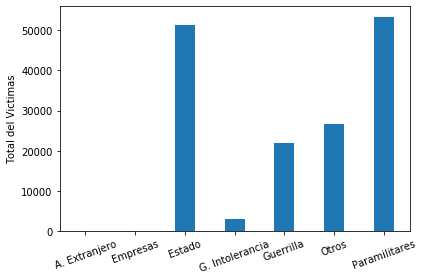

In [24]:
plt.bar(index, our_alldept.groupby('Resp').sum()['Nvi'], width=0.4)
plt.xticks(index, Labels, rotation=20)
plt.ylabel("Total del Victimas")
plt.tight_layout()
plt.show()

### Guardando nuevo DataFrame 

In [25]:
our_alldept.to_csv('New_Data.csv', index=False)

Haciendo intervalos de tiempo 

In [26]:
#---- Creando nuevo DataFrame por intervalos de 4 meses
Nw_df = []

for i in range(len(our_alldept['Fecha'])):
    comp = our_alldept['Fecha'][i].month
    if comp <=4:
        a = [str(our_alldept['Fecha'][i].year)+str(-1), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp > 4 and comp <= 8:
        a = [str(our_alldept['Fecha'][i].year)+str(-2), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp > 8 and comp <= 12:
        a = [str(our_alldept['Fecha'][i].year)+str(-3), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
               
our_alldept_v1 = pd.DataFrame(Nw_df, columns=['Cuarteto', 'Dept','Resp', 'Nvi', 'Tipo'])

In [27]:
our_alldept_v1.tail()

,Cuarteto,Dept,Resp,Nvi,Tipo
64766,2013-3,VICHADA,Guerrilla,1,Secuestro
64767,2013-3,VICHADA,Otros,4,Muerte
64768,2013-3,VICHADA,Otros,4,Lesion
64769,2013-3,VICHADA,Otros,4,Categoria Inexistente
64770,2018-3,VICHADA,A. Extranjero,3,Secuestro


__Guardando DataFrame__

In [29]:
our_alldept_v1.to_csv('New_Data_4m.csv', index=False)

In [30]:
#---- Creando nuevo DataFrame por intervalos de 3 meses
Nw_df = []

for i in range(len(our_alldept['Fecha'])):
    comp = our_alldept['Fecha'][i].month
    if comp <= 3:
        a = [str(our_alldept['Fecha'][i].year)+str(-1), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp > 3 and comp <= 6:
        a = [str(our_alldept['Fecha'][i].year)+str(-2), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp > 6 and comp <= 9:
        a = [str(our_alldept['Fecha'][i].year)+str(-3), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp > 9 and comp <= 12:
        a = [str(our_alldept['Fecha'][i].year)+str(-4), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
               
our_alldept_v2 = pd.DataFrame(Nw_df, columns=['Trimestre', 'Dept','Resp', 'Nvi', 'Tipo'])

In [31]:
our_alldept_v2[9412:9419]

,Trimestre,Dept,Resp,Nvi,Tipo
9412,2019-2,ANTIOQUIA,Estado,0,Desplazamiento
9413,2019-2,ANTIOQUIA,Otros,2,Muerte
9414,2019-2,ANTIOQUIA,Otros,2,Lesion
9415,2019-2,ANTIOQUIA,G. Intolerancia,1,Muerte
9416,2019-2,ANTIOQUIA,Otros,1,Muerte
9417,2001-1,ARAUCA,Estado,4,Muerte
9418,2001-1,ARAUCA,Otros,1,Lesion


In [33]:
our_alldept_v2.to_csv('New_Data_3m.csv', index=False)

In [34]:
#---- Creando nuevo DataFrame por intervalos de 6 meses
Nw_df = []

for i in range(len(our_alldept['Fecha'])):
    comp = our_alldept['Fecha'][i].month
    if comp <=6:
        a = [str(our_alldept['Fecha'][i].year)+str(-1), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
    elif comp > 6 and comp <= 12:
        a = [str(our_alldept['Fecha'][i].year)+str(-2), our_alldept['Dept'][i], our_alldept['Resp'][i], our_alldept['Nvi'][i], our_alldept['Tipo'][i]]
        Nw_df.append(a)
               
our_alldept_v3 = pd.DataFrame(Nw_df, columns=['Semestre', 'Dept','Resp', 'Nvi', 'Tipo'])

In [35]:
our_alldept_v3[9412:9419]

,Semestre,Dept,Resp,Nvi,Tipo
9412,2019-1,ANTIOQUIA,Estado,0,Desplazamiento
9413,2019-1,ANTIOQUIA,Otros,2,Muerte
9414,2019-1,ANTIOQUIA,Otros,2,Lesion
9415,2019-1,ANTIOQUIA,G. Intolerancia,1,Muerte
9416,2019-1,ANTIOQUIA,Otros,1,Muerte
9417,2001-1,ARAUCA,Estado,4,Muerte
9418,2001-1,ARAUCA,Otros,1,Lesion


In [36]:
our_alldept_v3.to_csv('New_Data_6m.csv', index=False)